<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

###  Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns, numpy as np

df_calls=pd.read_csv('/datasets/calls.csv')
df_internet=pd.read_csv('/datasets/internet.csv')
df_messages=pd.read_csv('/datasets/messages.csv')
df_tariffs=pd.read_csv('/datasets/tariffs.csv')
df_users=pd.read_csv('/datasets/users.csv')

def datas(df):
    print(df.info())
    print()
    print(df.describe())
    print()
    print(df.head())
    
print('---------------Звонки---------------------')
datas(df_calls)
print()
print('---------------Интернет-------------------')
datas(df_internet)
print()
print('---------------Сообщения------------------')
datas(df_messages)
print()
print('---------------Тарифы---------------------')
datas(df_tariffs)
print()
print('---------------Пользователи---------------')
datas(df_users)
print()

---------------Звонки---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000

---------------Интернет-------------------
<class 'pandas.core.

### Подготовка данных 

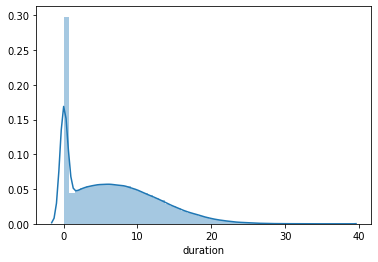

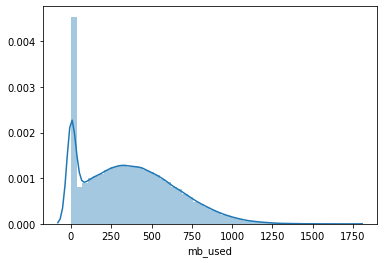

         duration_min  duration_median  duration_max  call_count
user_id                                                         
1000              0.0             5.81         24.18         368
1001              0.0             5.62         20.97         122
1002              0.0             5.21         26.44         217
1003              0.0             5.92         26.99         520
1004              0.0             3.78         21.86         176

user_id
1257    0.500000
1181    0.320513
1398    0.301887
1016    0.300000
1373    0.291667
Name: duration, dtype: float64

         duration_min  duration_median  duration_max  call_count
user_id                                                         
1257              0.0             0.45         18.49          14

В среднем у каждого пользователя 19.61% звонков по 0.0 мин



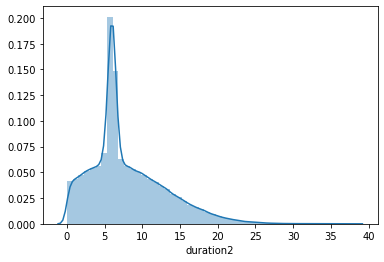

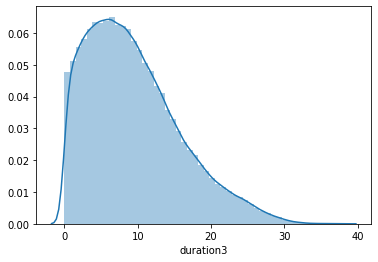

       id  call_date  duration  user_id  duration2  duration3  duration_round
0  1000_0 2018-07-25      0.00     1000       5.81       5.29             6.0
1  1000_1 2018-08-17      0.00     1000       5.81      12.97            13.0
2  1000_2 2018-06-11      2.85     1000       2.85       2.85             3.0
3  1000_3 2018-09-21     13.80     1000      13.80      13.80            14.0
4  1000_4 2018-12-15      5.18     1000       5.18       5.18             6.0
         mb_used_min  mb_used_median  mb_used_max  mb_used_count
user_id                                                         
1000             0.0         526.820      1364.05            211
1001             0.0         336.470       997.21             96
1002             0.0         300.310      1113.69            369
1003             0.0         533.905      1333.87            104
1004             0.0         488.480      1312.73            300

user_id
1434    0.250000
1041    0.241758
1190    0.239130
1351    0.233333


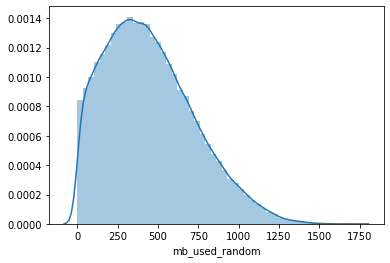

   Unnamed: 0      id  mb_used session_date  user_id  mb_used_random  \
0           0  1000_0   112.95   2018-11-25     1000          112.95   
1           1  1000_1  1052.81   2018-09-07     1000         1052.81   
2           2  1000_2  1197.26   2018-06-25     1000         1197.26   
3           3  1000_3   550.27   2018-08-22     1000          550.27   
4           4  1000_4   302.56   2018-09-24     1000          302.56   

   mb_used_round  
0          113.0  
1         1053.0  
2         1198.0  
3          551.0  
4          303.0  


In [2]:
#Приведите данные к нужным типам;

df_calls['call_date']=pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date']=pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date']=pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['churn_date']=pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date']=pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

#Найдите и исправьте ошибки в данных.

#Посмотрим распределение длительности звонков и интернет-трафика
sns.distplot(df_calls['duration'])
plt.show()
sns.distplot(df_internet['mb_used'])
plt.show()


#-----Звонки-----

#Посмотрим минимальную, среднюю и максимальную длительность звонков для каждого ползователя, а также кол-во звонков
df_calls_grouped=df_calls.groupby('user_id').agg({'duration':['min','median', 'max', 'count']})#.reset_index()
df_calls_grouped.columns=[ 'duration_min', 'duration_median', 'duration_max', 'call_count']
print(df_calls_grouped.head())
print()

#Посмотрим отношеие кол-ва звонков по 0.0 мин к общему кол-ву звонков для каждого пользователя
percent_calls=df_calls.query('duration==0').groupby('user_id')['duration'].count()/df_calls.groupby('user_id')['duration'].count()
print(percent_calls.sort_values(ascending=False).head())
print()
print(df_calls_grouped.query('user_id==1257'))
print()
print('В среднем у каждого пользователя {:.2%} звонков по 0.0 мин'.format(percent_calls.mean()))
print()

#Заменим нули на медиану для каждого пользователя
def zero_calls_median(row):
    if row['duration']==0:
        return df_calls_grouped.loc[row['user_id'], 'duration_median']
    else:
        return row['duration']
df_calls['duration2']=df_calls.apply(zero_calls_median, axis=1)

#Посмотрим как изменилось распределение:
sns.distplot(df_calls['duration2'])
plt.show()

#Заменим нули на случайные числа в пределах минимума и максимума для каждого пользователя
def zero_calls_random(row):
    if row['duration']==0:
        return round(random.uniform(0, df_calls_grouped.loc[row['user_id'], 'duration_max'] ), 2)
    else:
        return row['duration']
df_calls['duration3']=df_calls.apply(zero_calls_random, axis=1)

#Посмотрим как изменилось распределение:
sns.distplot(df_calls['duration3'])
plt.show()

#Так как по условиям тарифов все звонки округляются в большую сторону, 
#создадим еще один столбец с кол-вом минут, израсходованных "по тарифу"
df_calls['duration_round']=df_calls['duration3'].round()
def rounding (row):
    if row['duration_round']<row['duration3']:
        row['duration_round']+=1
        return row['duration_round']
    else:
        return row['duration_round']
df_calls['duration_round']=df_calls.apply(rounding, axis=1)

print(df_calls.head())


#------Интернет-----

#Посмотрим минимальную, среднюю и максимальную длительность интернет-сессий для каждого ползователя
df_internet_grouped=df_internet.groupby('user_id').agg({'mb_used':['min','median', 'max', 'count']})
df_internet_grouped.columns=['mb_used_min', 'mb_used_median', 'mb_used_max', 'mb_used_count']
print(df_internet_grouped.head())
print()

#Посмотрим отношеие кол-ва интернет-сессий по 0.0 мб к общему кол-ву интернет-сессий для каждого пользователя
percent_internet=df_internet.query('mb_used==0').groupby('user_id')['mb_used'].count()/df_internet.groupby('user_id')['mb_used'].count()
print(percent_internet.sort_values(ascending=False).head())
print()
#print(df_calls_grouped.query('user_id==1257'))
print()
print('В среднем у каждого пользователя {:.2%} интернет-сессий по 0.0 мин'.format(percent_internet.mean()))
print()

#Заменим нули на случайные числа в пределах минимума и максимума для каждого пользователя
def zero_internet_random(row):
    if row['mb_used']==0:
        return round(random.uniform(0, df_internet_grouped.loc[row['user_id'], 'mb_used_max'] ), 2)
    else:
        return row['mb_used']
df_internet['mb_used_random']=df_internet.apply(zero_internet_random, axis=1)

#Посмотрим как изменилось распределение:
sns.distplot(df_internet['mb_used_random'])
plt.show()

#Так как по условиям тарифов все мегабайты округляются в большую сторону, 
#создадим еще один столбец с кол-вом мегабайт, израсходованных "по тарифу"
df_internet['mb_used_round']=df_internet['mb_used_random'].round()
def rounding2 (row):
    if row['mb_used_round']<row['mb_used_random']:
        row['mb_used_round']+=1
        return row['mb_used_round']
    else:
        return row['mb_used_round']
df_internet['mb_used_round']=df_internet.apply(rounding2, axis=1)

print(df_internet.head())

In [3]:
#Посчитайте для каждого пользователя:
#количество сделанных звонков и израсходованных минут разговора по месяцам

#Добавим столбец с месяцем 
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

df_calls_pivot=df_calls.pivot_table(index=['user_id', 'month'], values='duration_round', aggfunc=['count', 'sum'])
df_calls_pivot.columns=['call_count', 'call_sum']
df_calls_pivot=df_calls_pivot.reset_index()
print(df_calls_pivot.head())

   user_id  month  call_count  call_sum
0     1000      5          22     228.0
1     1000      6          43     322.0
2     1000      7          47     416.0
3     1000      8          52     545.0
4     1000      9          58     638.0


In [4]:
#количество отправленных сообщений по месяцам

df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages_pivot=df_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc=['count'])
df_messages_pivot.columns=['messages_count']
df_messages_pivot=df_messages_pivot.reset_index()
print(df_messages_pivot.head())

   user_id  month  messages_count
0     1000      5              22
1     1000      6              60
2     1000      7              75
3     1000      8              81
4     1000      9              57


In [5]:
#объем израсходованного интернет-трафика по месяцам
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

df_internet_pivot=df_internet.pivot_table(index=['user_id', 'month'], values='mb_used_round', aggfunc='sum')
df_internet_pivot=df_internet_pivot.reset_index()
print(df_internet_pivot.head())

   user_id  month  mb_used_round
0     1000      5         3295.0
1     1000      6        26873.0
2     1000      7        14470.0
3     1000      8        15730.0
4     1000      9        15947.0


In [6]:
#Посчитайте помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, 
#сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, 
#соответствующую тарифному плану).

#Объединим таблицы df_calls_pivot, df_messages_pivot, df_internet_pivot и df_users
df_pivot=df_calls_pivot.merge(df_messages_pivot, on=['user_id', 'month'])
df_pivot=df_pivot.merge(df_internet_pivot, on=['user_id', 'month'])
df_pivot=df_pivot.merge(df_users, on='user_id')

#Создадим функцию для подсчета выручки
def revenue (row):
    if row['tariff']=='smart':
        minutes=row['call_sum']-df_tariffs.loc[0, 'minutes_included']
        messages=row['messages_count']-df_tariffs.loc[0, 'messages_included']
        mb=row['mb_used_round']-df_tariffs.loc[0, 'mb_per_month_included']
        
        if minutes>0:
            minutes_rub=minutes*df_tariffs.loc[0, 'rub_per_minute']
        else:
            minutes_rub=0
            
        if messages>0:
            messages_rub=messages*df_tariffs.loc[0, 'rub_per_message']
        else:
            messages_rub=0
            
        
        if mb>0:
            gb=(mb*0.001).round()
            if gb<(mb*0.001):
                gb+=1
            gb_rub=gb*df_tariffs.loc[0, 'rub_per_gb']
            
        else:
            gb_rub=0
            
        revenue=minutes_rub+messages_rub+gb_rub+df_tariffs.loc[0, 'rub_monthly_fee']
        return revenue
            
        
    else:
        minutes=row['call_sum']-df_tariffs.loc[1, 'minutes_included']
        messages=row['messages_count']-df_tariffs.loc[1, 'messages_included']
        mb=row['mb_used_round']-df_tariffs.loc[1, 'mb_per_month_included']
        
        
        if minutes>0:
            minutes_rub=minutes*df_tariffs.loc[1, 'rub_per_minute']
        else:
            minutes_rub=0
            
        if messages>0:
            messages_rub=messages*df_tariffs.loc[1, 'rub_per_message']
        else:
            messages_rub=0
            
        
        if mb>0:
            gb=(mb*0.001).round()
            if gb<(mb*0.001):
                gb+=1
            gb_rub=gb*df_tariffs.loc[1, 'rub_per_gb']
        else:
            gb_rub=0
            
        revenue=minutes_rub+messages_rub+gb_rub+df_tariffs.loc[1, 'rub_monthly_fee']
        return revenue
        
        
df_pivot['revenue']=df_pivot.apply(revenue, axis=1)


df_pivot.head()

,user_id,month,call_count,call_sum,messages_count,mb_used_round,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
0,1000,5,22,228.0,22,3295.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,6,43,322.0,60,26873.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,7,47,416.0,75,14470.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
3,1000,8,52,545.0,81,15730.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
4,1000,9,58,638.0,57,15947.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0


**Вывод**  
  
Во многих датафреймах даты были записанные в object. Перевела их в datetime.

В таблице со звонками есть много строк с длиной разговора 0.0 мин, в среднем 19% от всех разговоров.   
При этом у одного из пользователей таких звонков половина, а у многих около 30%.  
Это странно, похоже на ошибку. Их слишком много чтобы просто их удалить.  
Если заменить 0.0 на среднее или медиану по каждому пользователю, "всплеск" в распределеии сместится вправо, в середину.  
Я заменила 0.0 на случайное число в пределах минимума и максимума для каждого пользователя. Мне такой вариант кажется наиболее оптимальным.    
В таблице с интернет-трафиком тоже есть подозрительные строки с 0.0 мб. Я также заменила 0.0 на случайные числа в пределах мин и макс по каждому пользователю.  
Округлила минуты и мегабайты в большую сторону, как по условиям тарифов.

Посчитайла для каждого пользователя:  
количество сделанных звонков и израсходованных минут разговора по месяцам;  
количество отправленных сообщений по месяцам;  
объем израсходованного интернет-трафика по месяцам;  
помесячную выручку с каждого пользователя.

### Анализ данных 

           user_id        month   call_count     call_sum  messages_count  \
count  1915.000000  1915.000000  1915.000000  1915.000000     1915.000000   
mean   1247.916449     8.319060    58.871540   581.925326       38.767102   
std     147.151477     2.931832    25.555688   259.200693       26.810513   
min    1002.000000     1.000000     1.000000     1.000000        1.000000   
25%    1123.000000     6.000000    40.000000   394.000000       17.000000   
50%    1244.000000     9.000000    60.000000   595.000000       34.000000   
75%    1383.000000    11.000000    76.000000   752.500000       55.000000   
max    1499.000000    12.000000   198.000000  1835.000000      143.000000   

       mb_used_round          age      revenue  
count    1915.000000  1915.000000  1915.000000  
mean    20982.387467    46.909138  2426.511227  
std      7429.529858    16.162740  1414.206468  
min        63.000000    18.000000   550.000000  
25%     16369.500000    34.000000  1296.500000  
50%     2116

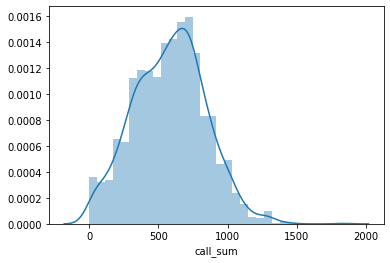

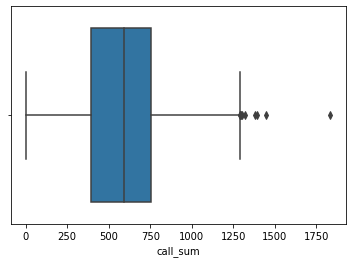


Сообщения:
среднее:  38.76710182767624
медиана: 34.0
дисперсия: 718.8036193391555
стандартное отклонение: 26.810513224090947
По правилу трех сигм:
выбросов слева: 0
выбросов справа: 11


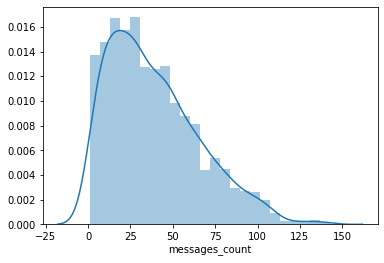

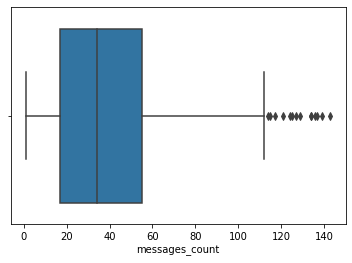


Интернет трафик, мегабайты:
среднее:  20982.387467362925
медиана: 21169.0
дисперсия: 55197913.911441594
стандартное отклонение: 7429.52985803554
По правилу трех сигм:
выбросов слева: 0
выбросов справа: 5


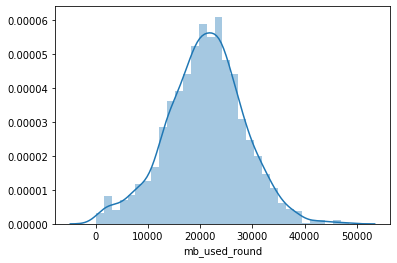

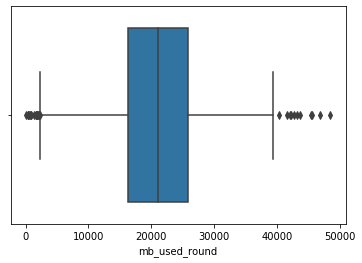

Выручка:
среднее:  2426.511227154047
медиана: 2338.0
дисперсия: 1999979.935479946
стандартное отклонение: 1414.2064684762074
По правилу трех сигм:
выбросов слева: 0
выбросов справа: 12


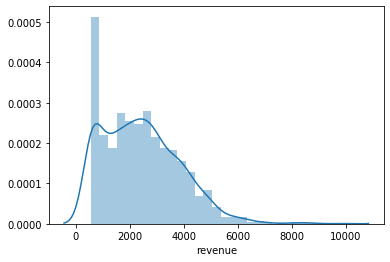

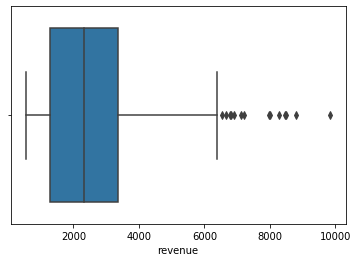


Для пользователей тарифа Ультра:

Звонки:
среднее:  772.6702127659574
медиана: 753.0
дисперсия: 192784.68204096667
стандартное отклонение: 439.07252480765254
По правилу трех сигм:
выбросов слева: 0
выбросов справа: 2


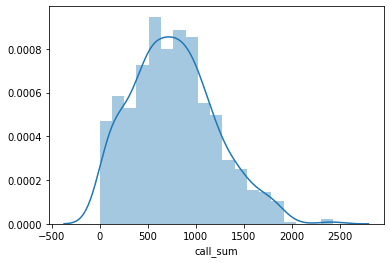

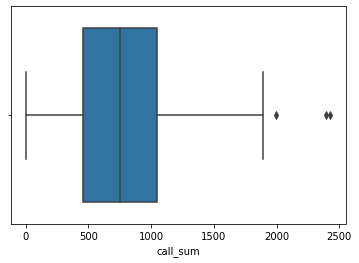


Сообщения:
среднее:  61.640957446808514
медиана: 53.0
дисперсия: 2008.5500113324078
стандартное отклонение: 44.816849636408044
По правилу трех сигм:
выбросов слева: 0
выбросов справа: 3


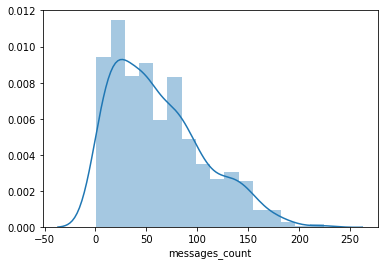

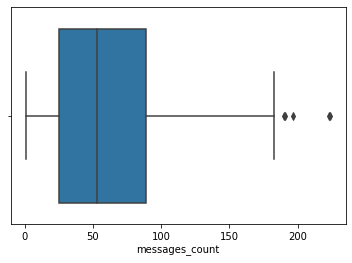


Интернет трафик, мегабайты:
среднее:  20857.093085106382
медиана: 20690.0
дисперсия: 104719614.26562455
стандартное отклонение: 10233.260197299029
По правилу трех сигм:
выбросов слева: 0
выбросов справа: 1


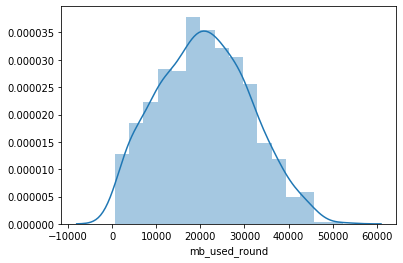

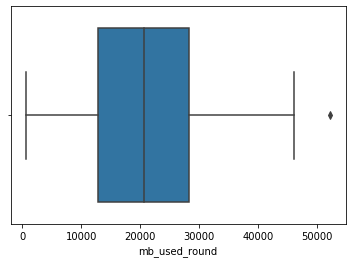

Выручка:
среднее:  2108.5771276595747
медиана: 1950.0
дисперсия: 192120.07659999433
стандартное отклонение: 438.31504263485454
По правилу трех сигм:
выбросов слева: 0
выбросов справа: 27


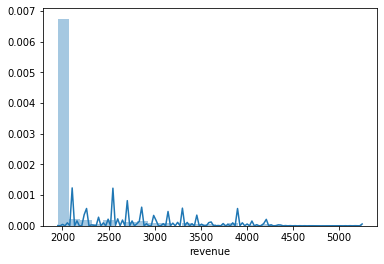

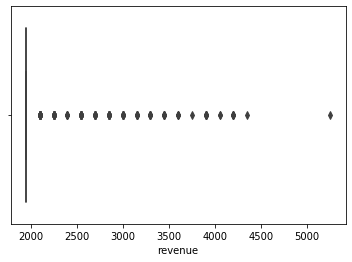

In [7]:
#Опишите поведение клиентов оператора, исходя из выборк. Сколько минут разговора, сколько сообщений и какой объём
#интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и 
#стандартное отклонение. Постройте гистограммы. Опишите распределения.
import numpy as np

df_users_smart=df_pivot.query('tariff=="smart"')
print(df_users_smart.describe())
print()
df_users_ultra=df_pivot.query('tariff=="ultra"')
print(df_users_ultra.head())

def mean (df, column):
    mean=df[column].mean()
    median=df[column].median()
    variance=np.var(df[column], ddof=1)
    standard_deviation=np.std(df[column], ddof=1)
    left=mean-3*standard_deviation
    right=mean+3*standard_deviation
    left_df=df[df[column] < left]
    right_df=df[df[column] > right]
    
    print('среднее: ', mean)
    print('медиана:', median)
    print('дисперсия:', variance)
    print('стандартное отклонение:',standard_deviation)
    print('По правилу трех сигм:')
    print('выбросов слева:', len(left_df))
    print('выбросов справа:', len(right_df))
    sns.distplot(df[column])
    plt.show()
    sns.boxplot(df[column])
    plt.show()

def out (df):
    print()
    print('Звонки:')
    mean(df, 'call_sum')
    print()
    print('Сообщения:')
    mean(df, 'messages_count')
    print()
    print('Интернет трафик, мегабайты:')
    mean(df, 'mb_used_round')
    print('Выручка:')
    mean(df, 'revenue')

print()
print('Для пользователей тарифа Смарт:')
out(df_users_smart)
print()
print('Для пользователей тарифа Ультра:')
out(df_users_ultra)





**Вывод**   
Для пользователей тарифа Смарт:  
В среднем пользователи разговаривают по 595 минут, отправляют 34 сообщения и используют около 17 гб трафика. Это почти укладывается в условия тарифа. Каждый месяц пользователи лишь немного выходят за пределы условий тарифа.

Для пользователей тарифа Ультра:  
В среднем пользователи разговаривают по 755 минут, отправляют 53 сообщения и используют около 20 гб трафика. Это полностью укладывается в условия тарифа. Пользователи редко выходят за порги условий тарифа.

Посчитала среднее количество, дисперсию и стандартное отклонение для звонков, сообщений и интернет трафика обоих тарифов. Построила гистограммы.


### Проверка гипотез

In [8]:
#средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
#средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
#Пороговое значение alpha задайте самостоятельно.


from scipy import stats as st
alpha = .05
results = st.ttest_ind(df_users_smart['revenue'], df_users_ultra['revenue'], equal_var = False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print()
df_users_moscow=df_pivot.query('city=="Москва"')
df_users_region=df_pivot.query('city!="Москва"')

results = st.ttest_ind(df_users_moscow['revenue'],df_users_region['revenue'] , equal_var = False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  2.0964378364006207e-18
Отвергаем нулевую гипотезу

p-значение:  0.03364257170582866
Отвергаем нулевую гипотезу


**Вывод**   
Сформируем нулевую гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова.  
Гипотеза не подтвердилась.  
Следовательно средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Сформируем другую нулевую гипотезу: средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов.  
Гипотеза подтвердилась.  
Значит средняя выручка пользователей из Москвы  не отличается от выручки пользователей из других регионов.

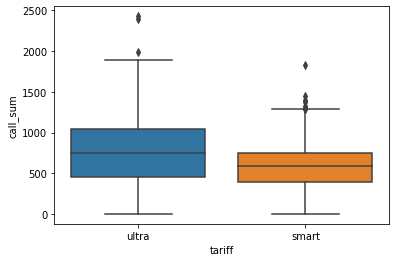

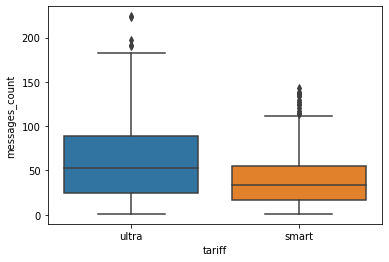

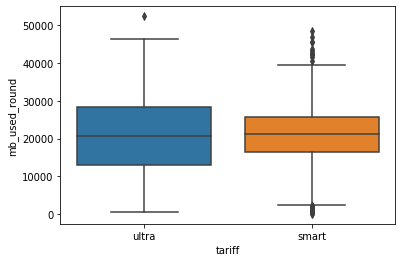

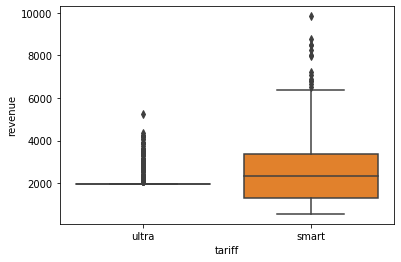

Пользователей тарифа Ультра: 29.80%
Пользователей тарифа Смарт: 70.20%


In [9]:
#Посмотрим боксплоты для двух тарифов

sns.boxplot(data=df_pivot, x='tariff', y='call_sum')
plt.show()
sns.boxplot(data=df_pivot, x='tariff', y='messages_count')
plt.show()
sns.boxplot(data=df_pivot, x='tariff', y='mb_used_round')
plt.show()
sns.boxplot(data=df_pivot, x='tariff', y='revenue')
plt.show()

print('Пользователей тарифа Ультра: {:.2%}'.format(len(df_users.query('tariff=="ultra"'))/len(df_users)))
print('Пользователей тарифа Смарт: {:.2%}'.format(len(df_users.query('tariff=="smart"'))/len(df_users)))


### Общий вывод  
Тарифом Смарт пользуется намного большее число пользователей, 70% от всех пользователей.  
Средняя выручка тарифа Смарт немного больше средней выручки тарифа Ультра.  
При этом звонков и сообщений они отправляют меньше, чем пользователи тарифа Ультра, а интернетом в среднем пользуются везде одинаково.    
На первый взгляд тариф Ультра дороже и должен приносить больше денег, но, проанализировав даные, я убедилась в обратном.  
Для компании Мегалайн тариф Смарт приносит больше денег, чем тариф Ультра.